## **The Walking Dead**

_IMDb_ | Ratings

In [139]:
# imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from highlight_text import fig_text

##### **Data Preparation**

In [140]:
title_basics = pd.read_csv("../data/title_basics.csv", low_memory=False)
title_episode = pd.read_csv("../data/title_episode.csv")
title_ratings = pd.read_csv("../data/title_ratings.csv")

In [141]:
twd_loc = title_basics[(title_basics['titleType']=='tvSeries') & (title_basics['primaryTitle'].str.contains('The Walking Dead', case=False))]
twd_loc

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
1049622,tt10148174,tvSeries,The Walking Dead: World Beyond,The Walking Dead: World Beyond,0,2020,2021,\N,"Drama,Horror,Sci-Fi"
1359774,tt10708060,tvSeries,Fear the Walking Dead: The Althea Tapes,Fear the Walking Dead: The Althea Tapes,0,2019,2019,\N,"Drama,Horror,Sci-Fi"
2644974,tt13062500,tvSeries,The Walking Dead: Daryl Dixon,The Walking Dead: Daryl Dixon,0,2023,\N,60,"Drama,Horror"
2999272,tt13721906,tvSeries,Blind Wave: The Walking Dead Reaction,Blind Wave: The Walking Dead Reaction,0,2015,\N,30,Talk-Show
3181359,tt14053904,tvSeries,The Walking Dead (Motion Comic),The Walking Dead (Motion Comic),0,2020,\N,\N,"Drama,Horror,Thriller"
3763586,tt15130518,tvSeries,The Walking Dead: Origins,The Walking Dead: Origins,0,2021,2021,\N,Documentary
3802362,tt1520211,tvSeries,The Walking Dead,The Walking Dead,0,2010,2022,45,"Drama,Horror,Thriller"
3813686,tt15223388,tvSeries,The Walking Dead: Hexagone,The Walking Dead: Hexagone,0,2021,\N,50,"Drama,Horror"
4056985,tt15669534,tvSeries,Tales of the Walking Dead,Tales of the Walking Dead,0,2022,2022,44,"Drama,Fantasy,Horror"
4845843,tt18546730,tvSeries,The Walking Dead: Dead City,The Walking Dead: Dead City,0,2023,\N,46,"Adventure,Drama,Horror"


tconst = tt1520211

In [142]:
title_episode_ratings = pd.merge(title_episode, title_ratings, on="tconst")

In [143]:
print(title_episode_ratings.shape)
print('')
title_episode_ratings.head()

(712376, 6)



,tconst,parentTconst,seasonNumber,episodeNumber,averageRating,numVotes
0,tt0041951,tt0041038,1,9,7.6,90
1,tt0042816,tt0989125,1,17,7.6,12
2,tt0044093,tt0959862,1,6,4.5,18
3,tt0045960,tt0044284,2,3,6.9,191
4,tt0046150,tt0341798,\N,\N,8.2,12


In [144]:
twd_episode_ratings = title_episode_ratings[title_episode_ratings['parentTconst']=='tt1520211']

In [145]:
print(twd_episode_ratings.shape)
print('')
twd_episode_ratings.head()

(177, 6)



,tconst,parentTconst,seasonNumber,episodeNumber,averageRating,numVotes
214239,tt11156952,tt1520211,11,1,8.3,9890
264022,tt12772726,tt1520211,10,17,7.1,7954
264023,tt12772732,tt1520211,10,18,6.2,8301
264024,tt12772738,tt1520211,10,19,7.3,8262
264025,tt12772744,tt1520211,10,20,5.2,9513


In [146]:
twd_episode_ratings.dtypes

tconst            object
parentTconst      object
seasonNumber      object
episodeNumber     object
averageRating    float64
numVotes           int64
dtype: object

In [147]:
# check for null values
twd_episode_ratings.isna().sum()

tconst           0
parentTconst     0
seasonNumber     0
episodeNumber    0
averageRating    0
numVotes         0
dtype: int64

In [148]:
twd_episode_ratings.loc[:, 'seasonNumber'] = pd.to_numeric(twd_episode_ratings['seasonNumber'], errors='coerce')

In [149]:
twd_episode_ratings.loc[:, 'episodeNumber'] = pd.to_numeric(twd_episode_ratings['episodeNumber'], errors='coerce')

In [150]:
twd_episode_ratings.dtypes

tconst            object
parentTconst      object
seasonNumber      object
episodeNumber     object
averageRating    float64
numVotes           int64
dtype: object

In [151]:
twd_episode_ratings.to_csv('../data/twd_episode_ratings.csv', index=False)

##### **Data Visualization**

In [152]:
from PIL import Image
import urllib

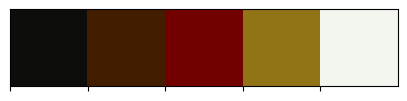

In [153]:
twd_v1 = ['#0D0D0C','#421D00', '#730000','#917416', '#F3F5EF']
sns.palplot(sns.color_palette(twd_v1))

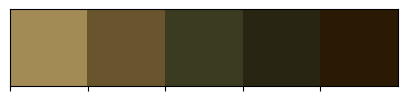

In [154]:
twd_v2 = ['#A28B55','#68552D', '#3B3B21','#282512', '#2A1A03']
sns.palplot(sns.color_palette(twd_v2))

_**Trendline**_

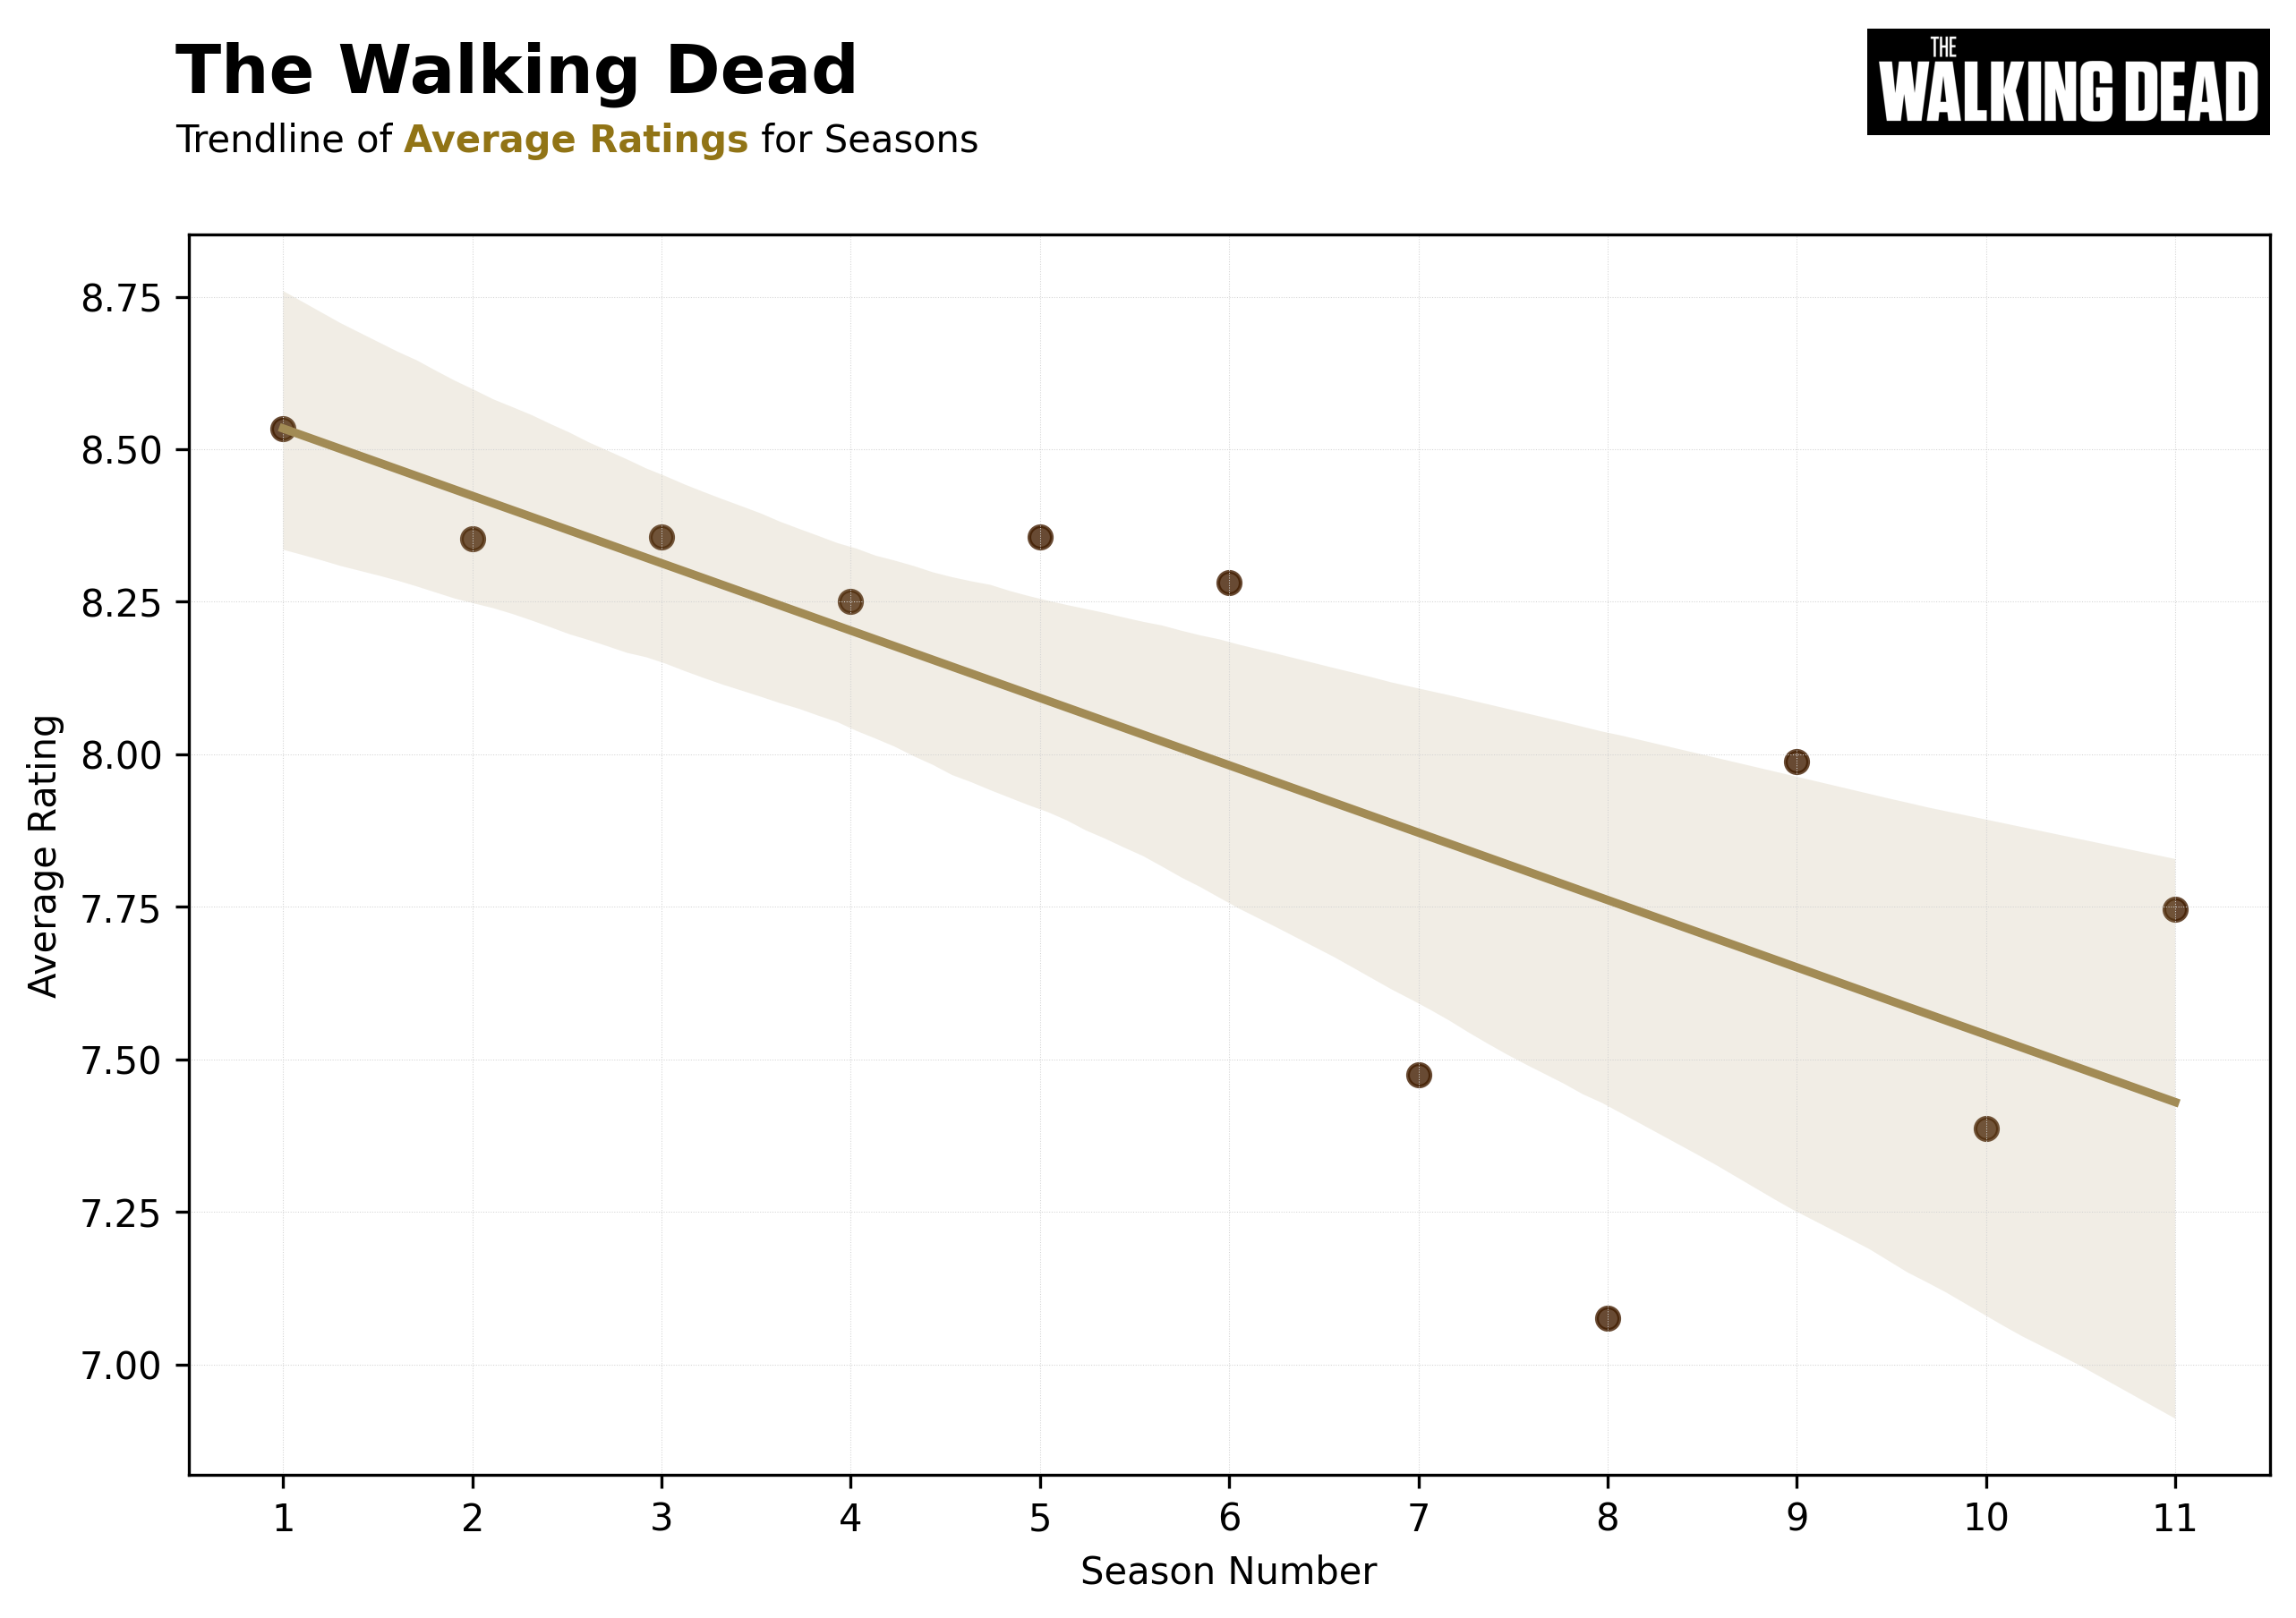

In [155]:
# aggregate ratings by season
df_season_avg_rating = twd_episode_ratings.groupby('seasonNumber')['averageRating'].mean().reset_index()

# plot
fig = plt.figure(figsize=(10, 6), dpi=300, facecolor="white")
ax = plt.subplot(111, facecolor="white")

# set the grid
ax.grid(
    visible = True, 
    lw = 0.25,
    ls = ":",
    color = "lightgrey"
)

sns.regplot(x='seasonNumber', y='averageRating', data=df_season_avg_rating, fit_reg=True, scatter_kws={'color': '#421D00'}, line_kws={'color': '#A28B55'})
plt.xlabel('Season Number')
plt.ylabel('Average Rating')

# set x-axis ticks to display all season numbers
plt.xticks(df_season_avg_rating['seasonNumber'])

# title and subtitle for the legend
fig_text(
    x = 0.12, y = 1,
    s = "The Walking Dead",
    color = "black",
    weight = "bold",
    size = 18,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fig_text(
    x = 0.12, y = 0.95,
    s = "Trendline of <Average Ratings> for Seasons",
    highlight_textprops=[
        {"color": "#917416", "weight": "bold"}
    ],
    color = "black",
    size = 10,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

logo_url = "https://upload.wikimedia.org/wikipedia/commons/2/2e/The_Walking_Dead_Logo.png"

logo_ax = fig.add_axes([0.75, .9, 0.15, 0.15], zorder=1)
logo_icon = Image.open(urllib.request.urlopen(logo_url))
logo_ax.imshow(logo_icon)
logo_ax.axis("off")

plt.show()

In [156]:
# save figure
fig.savefig('../figures/twd_seasons_avg.png', bbox_inches='tight')

_**Heatmap**_

In [157]:
print(sns.color_palette("coolwarm").as_hex())

['#6788ee', '#9abbff', '#c9d7f0', '#edd1c2', '#f7a889', '#e26952']


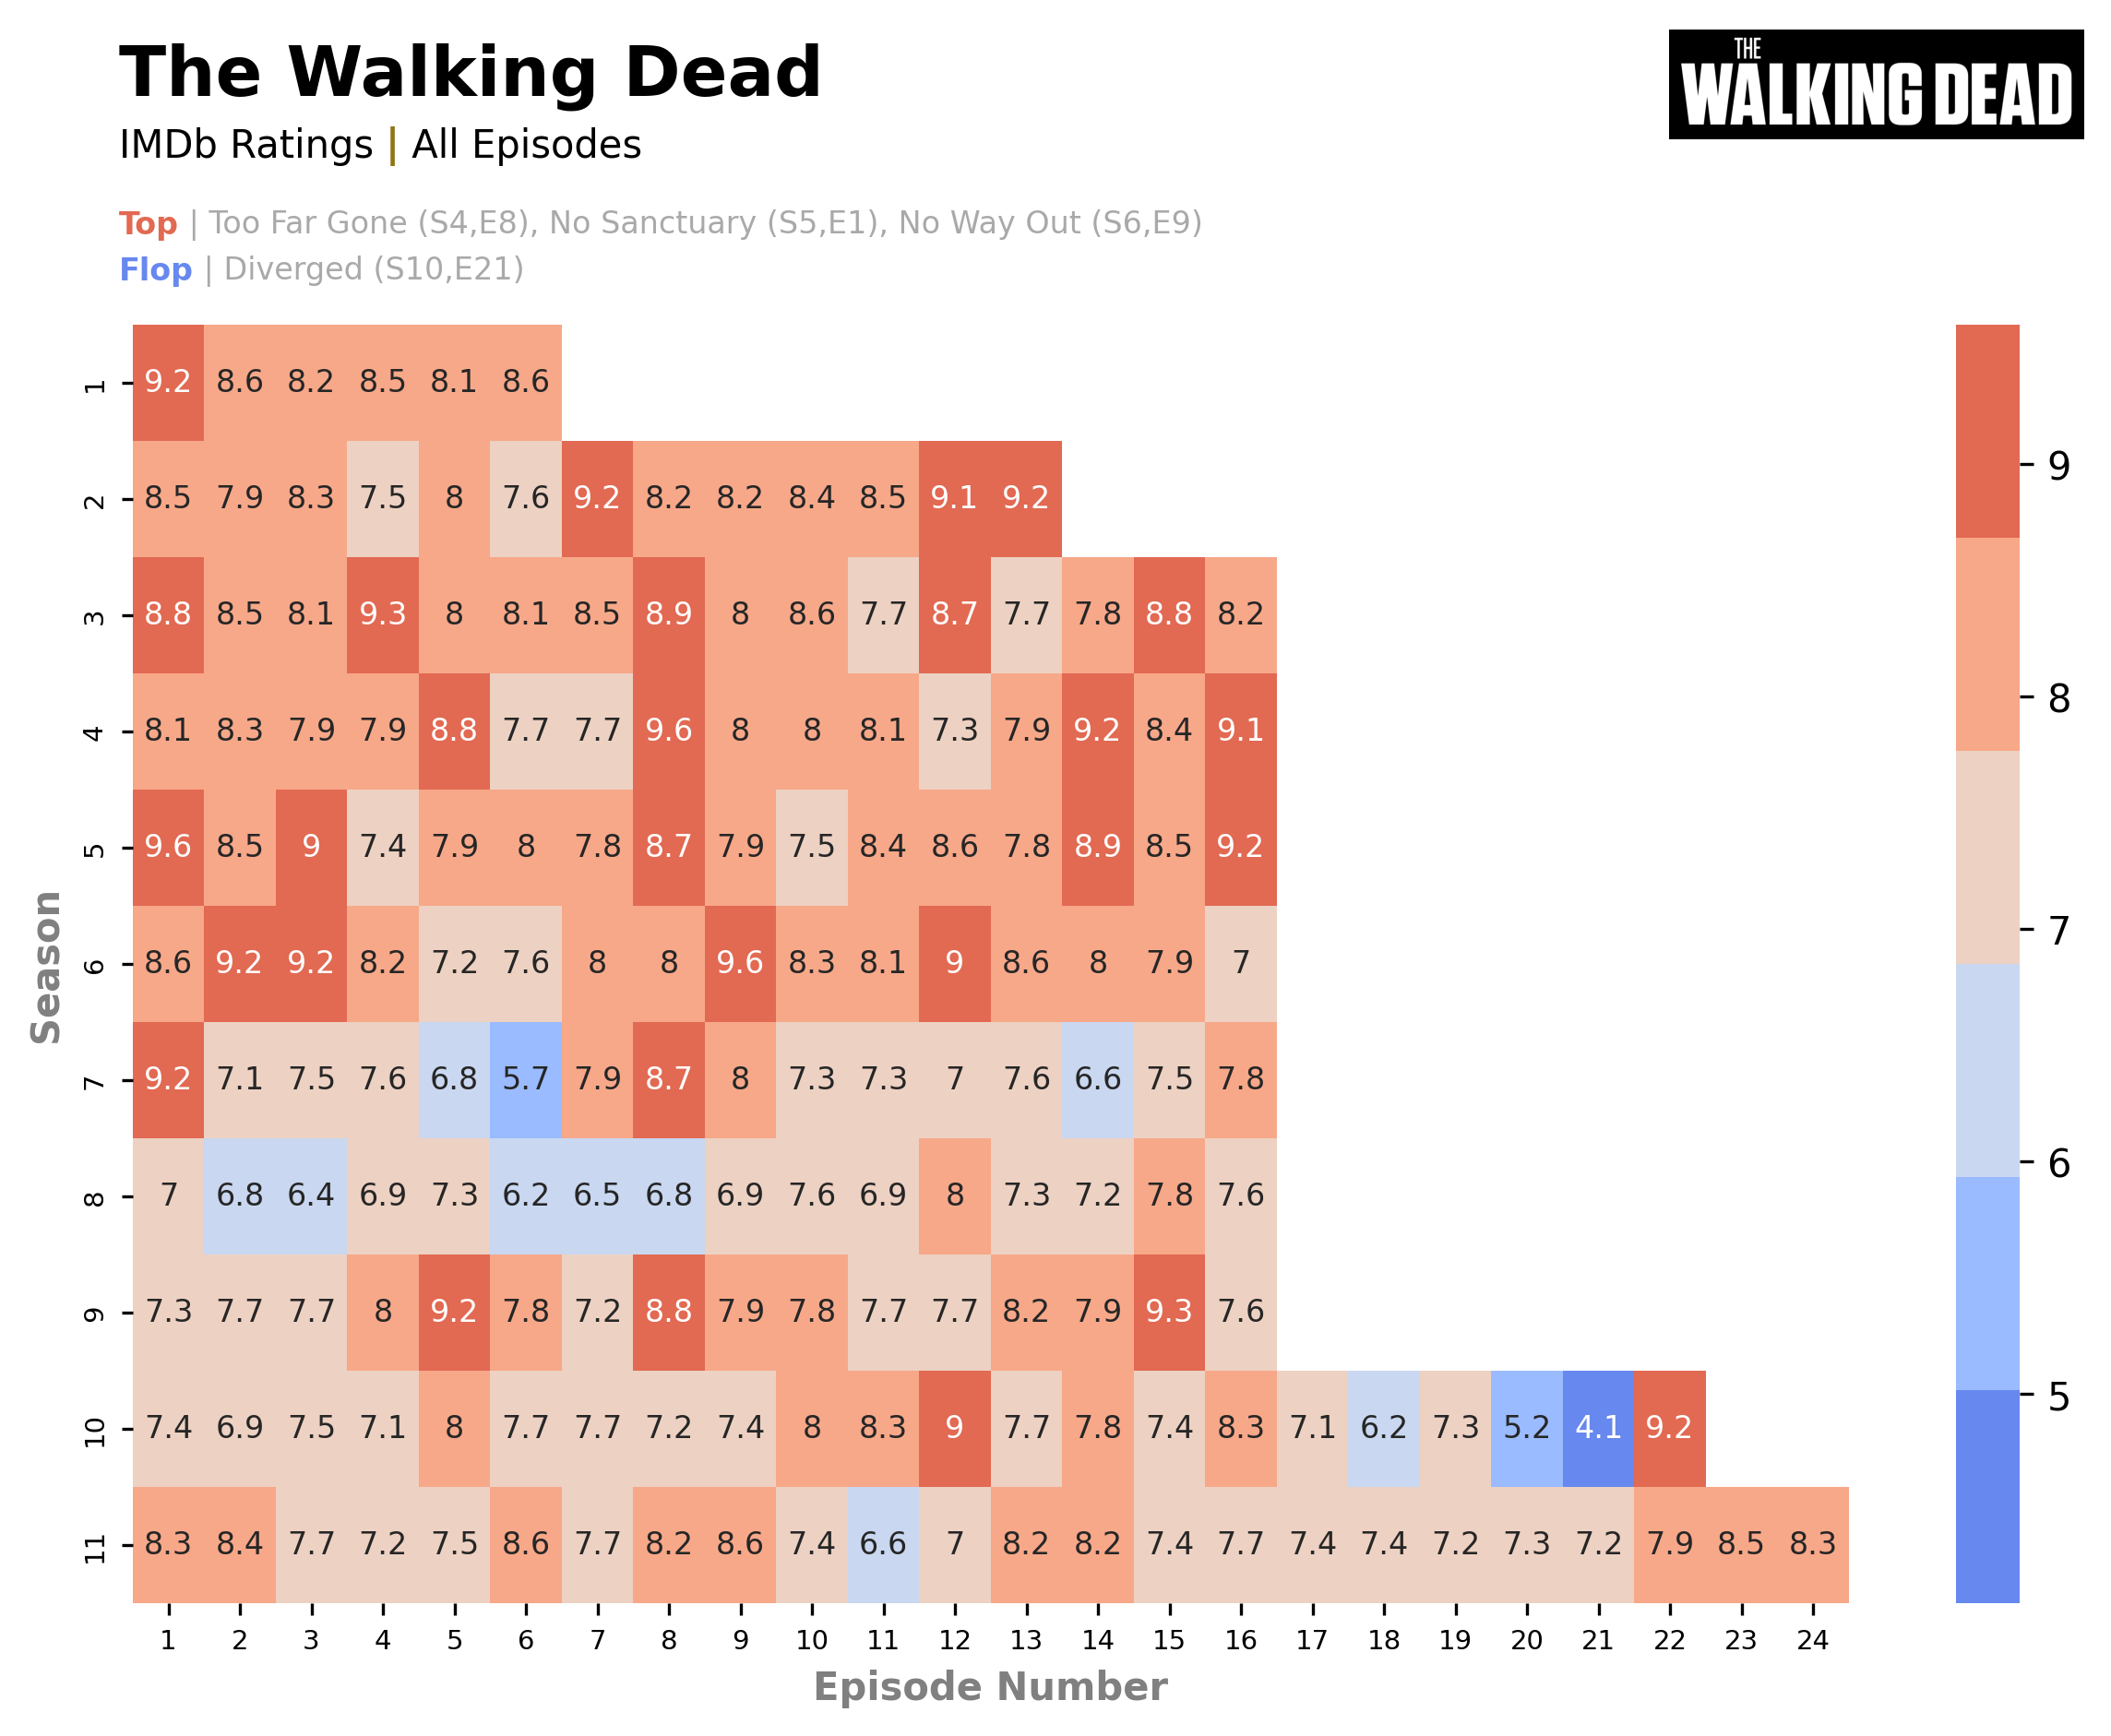

In [158]:
# pivot the dataframe
twd_pivot = twd_episode_ratings.pivot(index='seasonNumber', columns='episodeNumber', values='averageRating')

# plot
fig = plt.figure(figsize=(10, 6), dpi=300, facecolor="white")
ax = plt.subplot(111, facecolor="white")


colormap = sns.color_palette("coolwarm")
sns.heatmap(twd_pivot, annot=True, annot_kws={"size": 8}, cmap=colormap) # size reduce the numbers in the quadrants

# customize the ticks to match spinecolor and adjust label size
ax.tick_params(
    color = "black",
    length = 3,
    which = "major",
    labelsize = 7,
    labelcolor = "black",
    zorder = 3
)

plt.xlabel("Episode Number", color='grey', fontsize=10, weight='bold')
plt.ylabel("Season", color='grey', fontsize=10, weight='bold')

# title and subtitle for the legend
fig_text(
    x = 0.12, y = 1.05,
    s = "The Walking Dead",
    color = "black",
    weight = "bold",
    size = 18,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fig_text(
    x = 0.12, y = 1,
    s = "IMDb Ratings <|> All Episodes",
    highlight_textprops=[
        {"color": "#917416", "weight": "bold"}
    ],
    color = "black",
    size = 10,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fig_text(
    x = 0.12, y = 0.95,
    s = "<Top> | Too Far Gone (S4,E8), No Sanctuary (S5,E1), No Way Out (S6,E9)\n<Flop> | Diverged (S10,E21)",
    highlight_textprops=[
        {"color": "#E26952", "weight": "bold"},
        {"color": "#6788EE", "weight": "bold"}
    ],
    color = "darkgrey",
    size = 8,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

logo_url = "https://upload.wikimedia.org/wikipedia/commons/2/2e/The_Walking_Dead_Logo.png"

logo_ax = fig.add_axes([0.68, .95, 0.15, 0.15], zorder=1)
logo_icon = Image.open(urllib.request.urlopen(logo_url))
logo_ax.imshow(logo_icon)
logo_ax.axis("off")

plt.show()

In [159]:
# save figure
fig.savefig('../figures/twd_ratings_coolwarm.png', bbox_inches='tight')

In [160]:
print(sns.color_palette("rocket").as_hex())

['#35193e', '#701f57', '#ad1759', '#e13342', '#f37651', '#f6b48f']


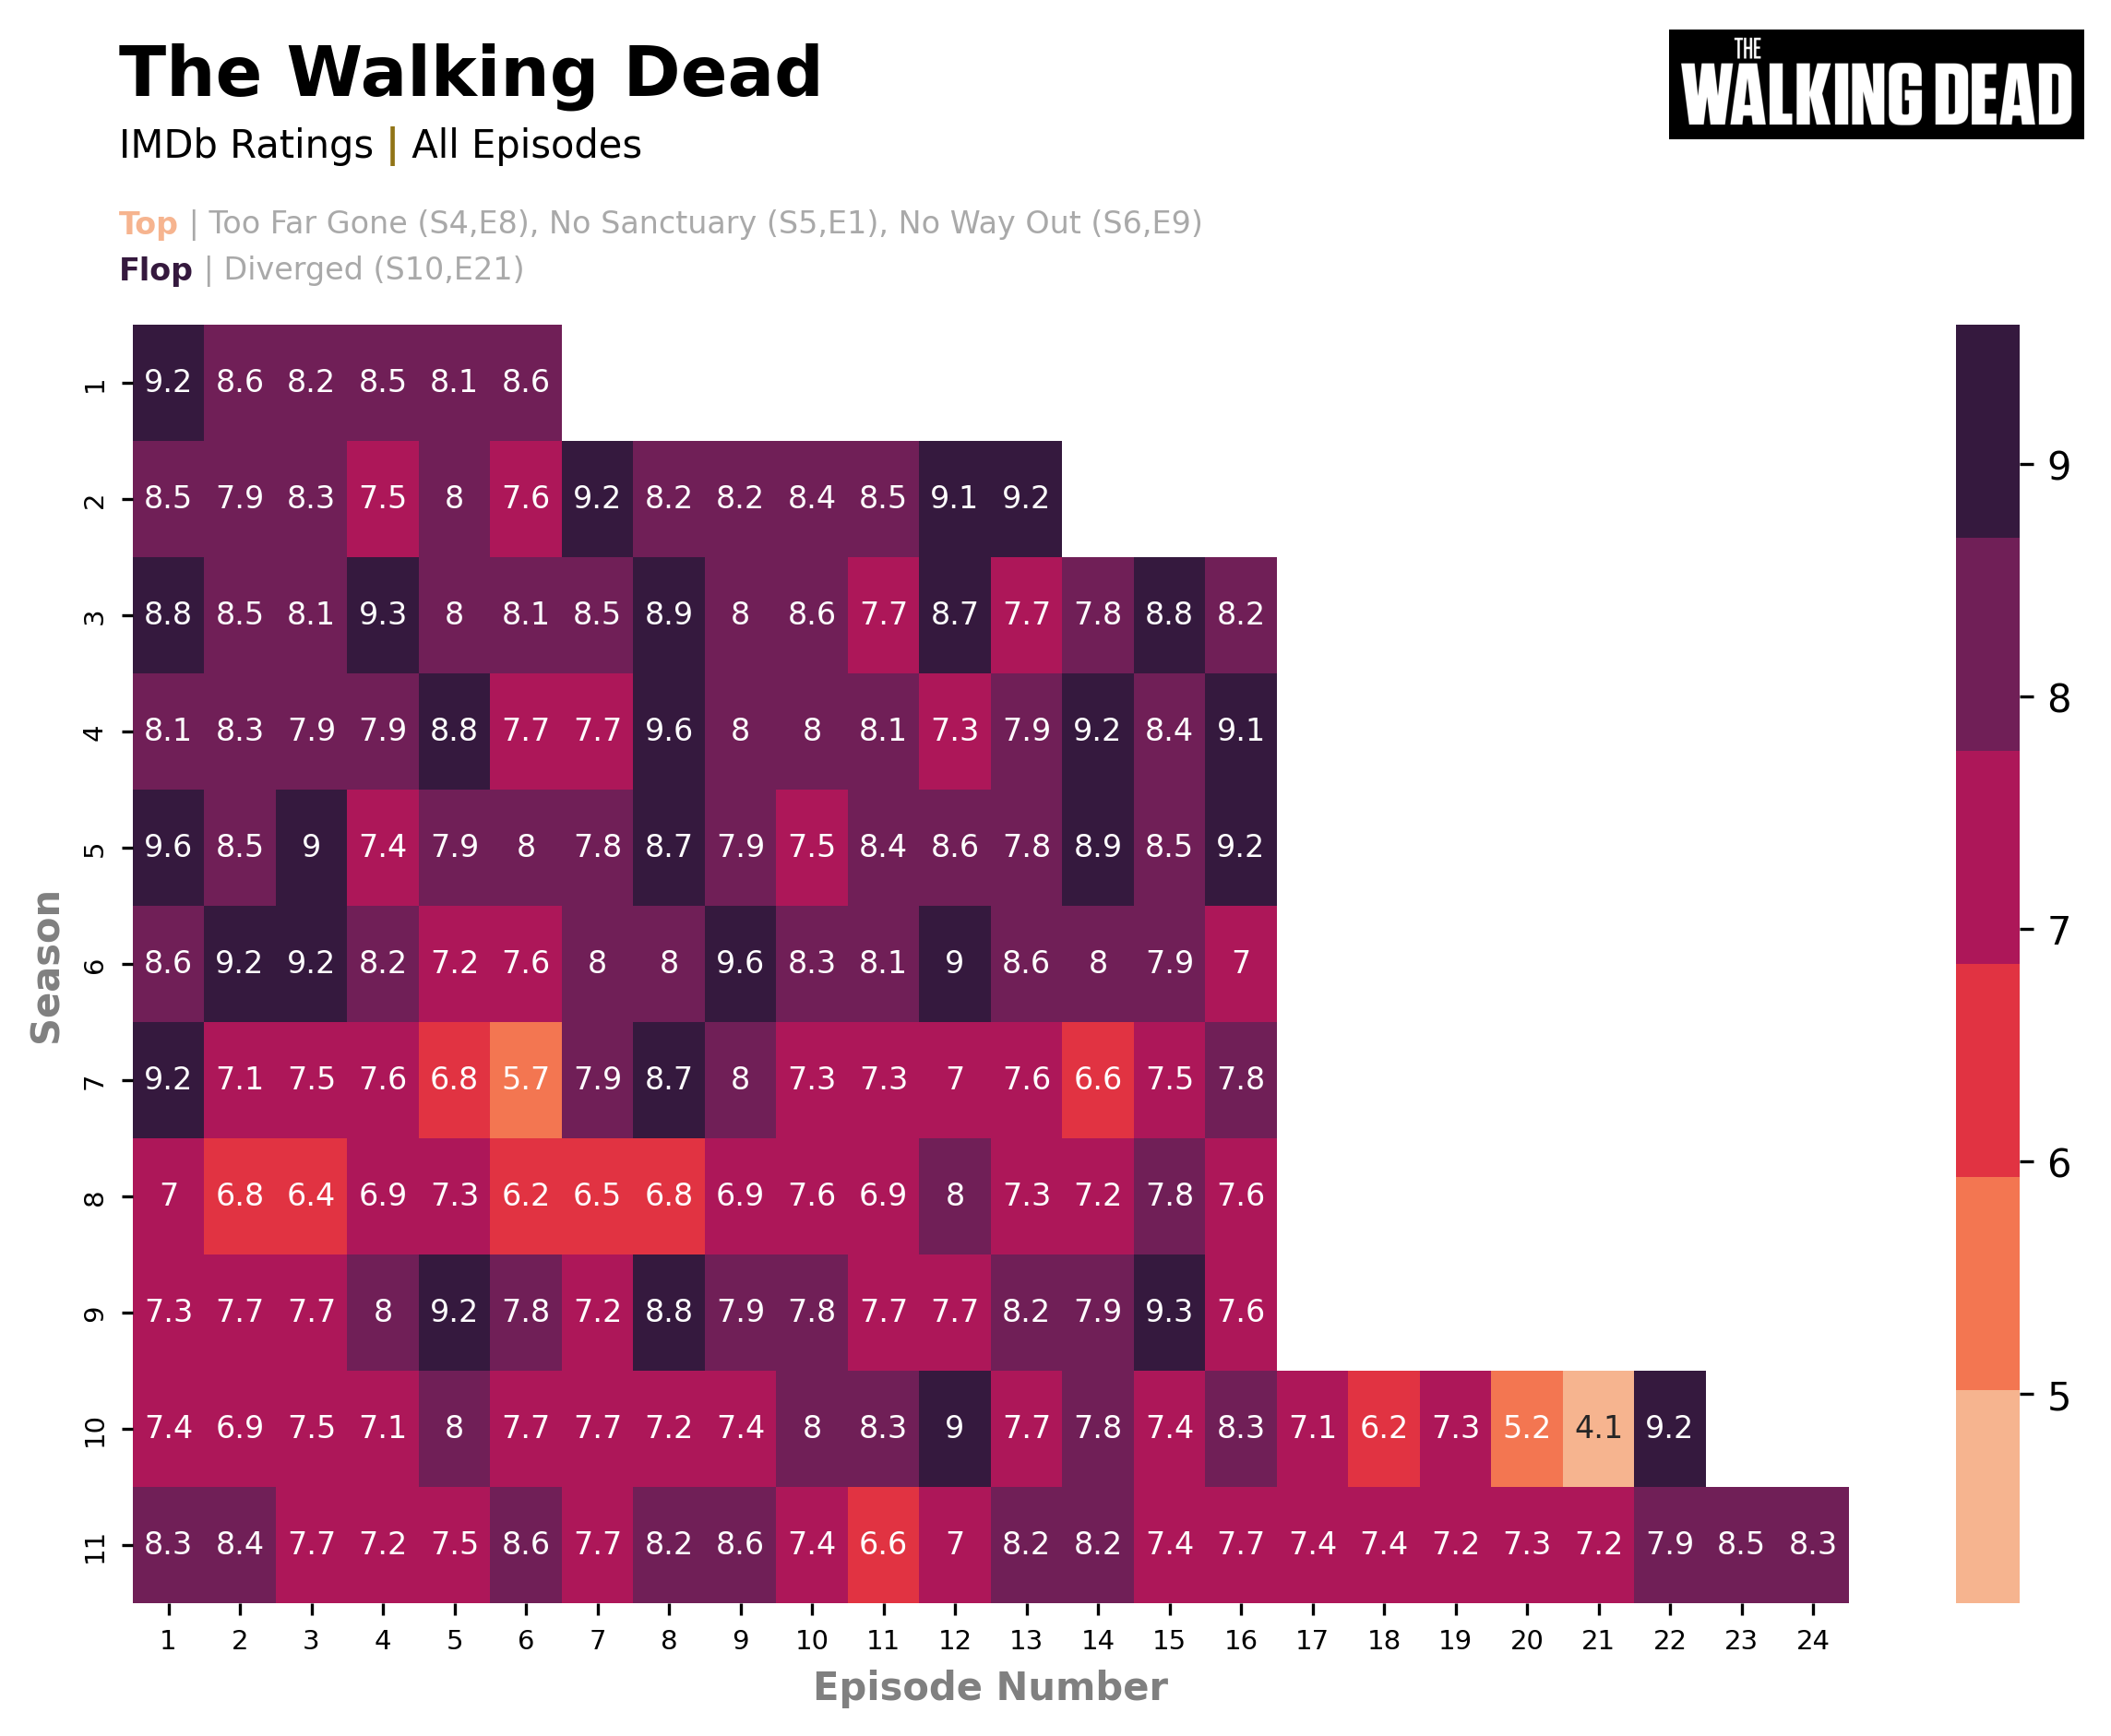

In [161]:
# pivot the dataframe
twd_pivot = twd_episode_ratings.pivot(index='seasonNumber', columns='episodeNumber', values='averageRating')

# plot
fig = plt.figure(figsize=(10, 6), dpi=300, facecolor="white")
ax = plt.subplot(111, facecolor="white")

colormap = sns.color_palette("rocket_r")
sns.heatmap(twd_pivot, annot=True, annot_kws={"size": 8}, cmap=colormap) # size reduce the numbers in the quadrants

# customize the ticks to match spinecolor and adjust label size
ax.tick_params(
    color = "black",
    length = 3,
    which = "major",
    labelsize = 7,
    labelcolor = "black",
    zorder = 3
)

plt.xlabel("Episode Number", color='grey', fontsize=10, weight='bold')
plt.ylabel("Season", color='grey', fontsize=10, weight='bold')

# title and subtitle for the legend
fig_text(
    x = 0.12, y = 1.05,
    s = "The Walking Dead",
    color = "black",
    weight = "bold",
    size = 18,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fig_text(
    x = 0.12, y = 1,
    s = "IMDb Ratings <|> All Episodes",
    highlight_textprops=[
        {"color": "#917416", "weight": "bold"}
    ],
    color = "black",
    size = 10,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fig_text(
    x = 0.12, y = 0.95,
    s = "<Top> | Too Far Gone (S4,E8), No Sanctuary (S5,E1), No Way Out (S6,E9)\n<Flop> | Diverged (S10,E21)",
    highlight_textprops=[
        {"color": "#F6B48F", "weight": "bold"},
        {"color": "#35193E", "weight": "bold"}
    ],
    color = "darkgrey",
    size = 8,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

logo_url = "https://upload.wikimedia.org/wikipedia/commons/2/2e/The_Walking_Dead_Logo.png"

logo_ax = fig.add_axes([0.68, .95, 0.15, 0.15], zorder=1)
logo_icon = Image.open(urllib.request.urlopen(logo_url))
logo_ax.imshow(logo_icon)
logo_ax.axis("off")

plt.show()

In [162]:
# save figure
fig.savefig('../figures/twd_ratings_rocket.png', bbox_inches='tight')

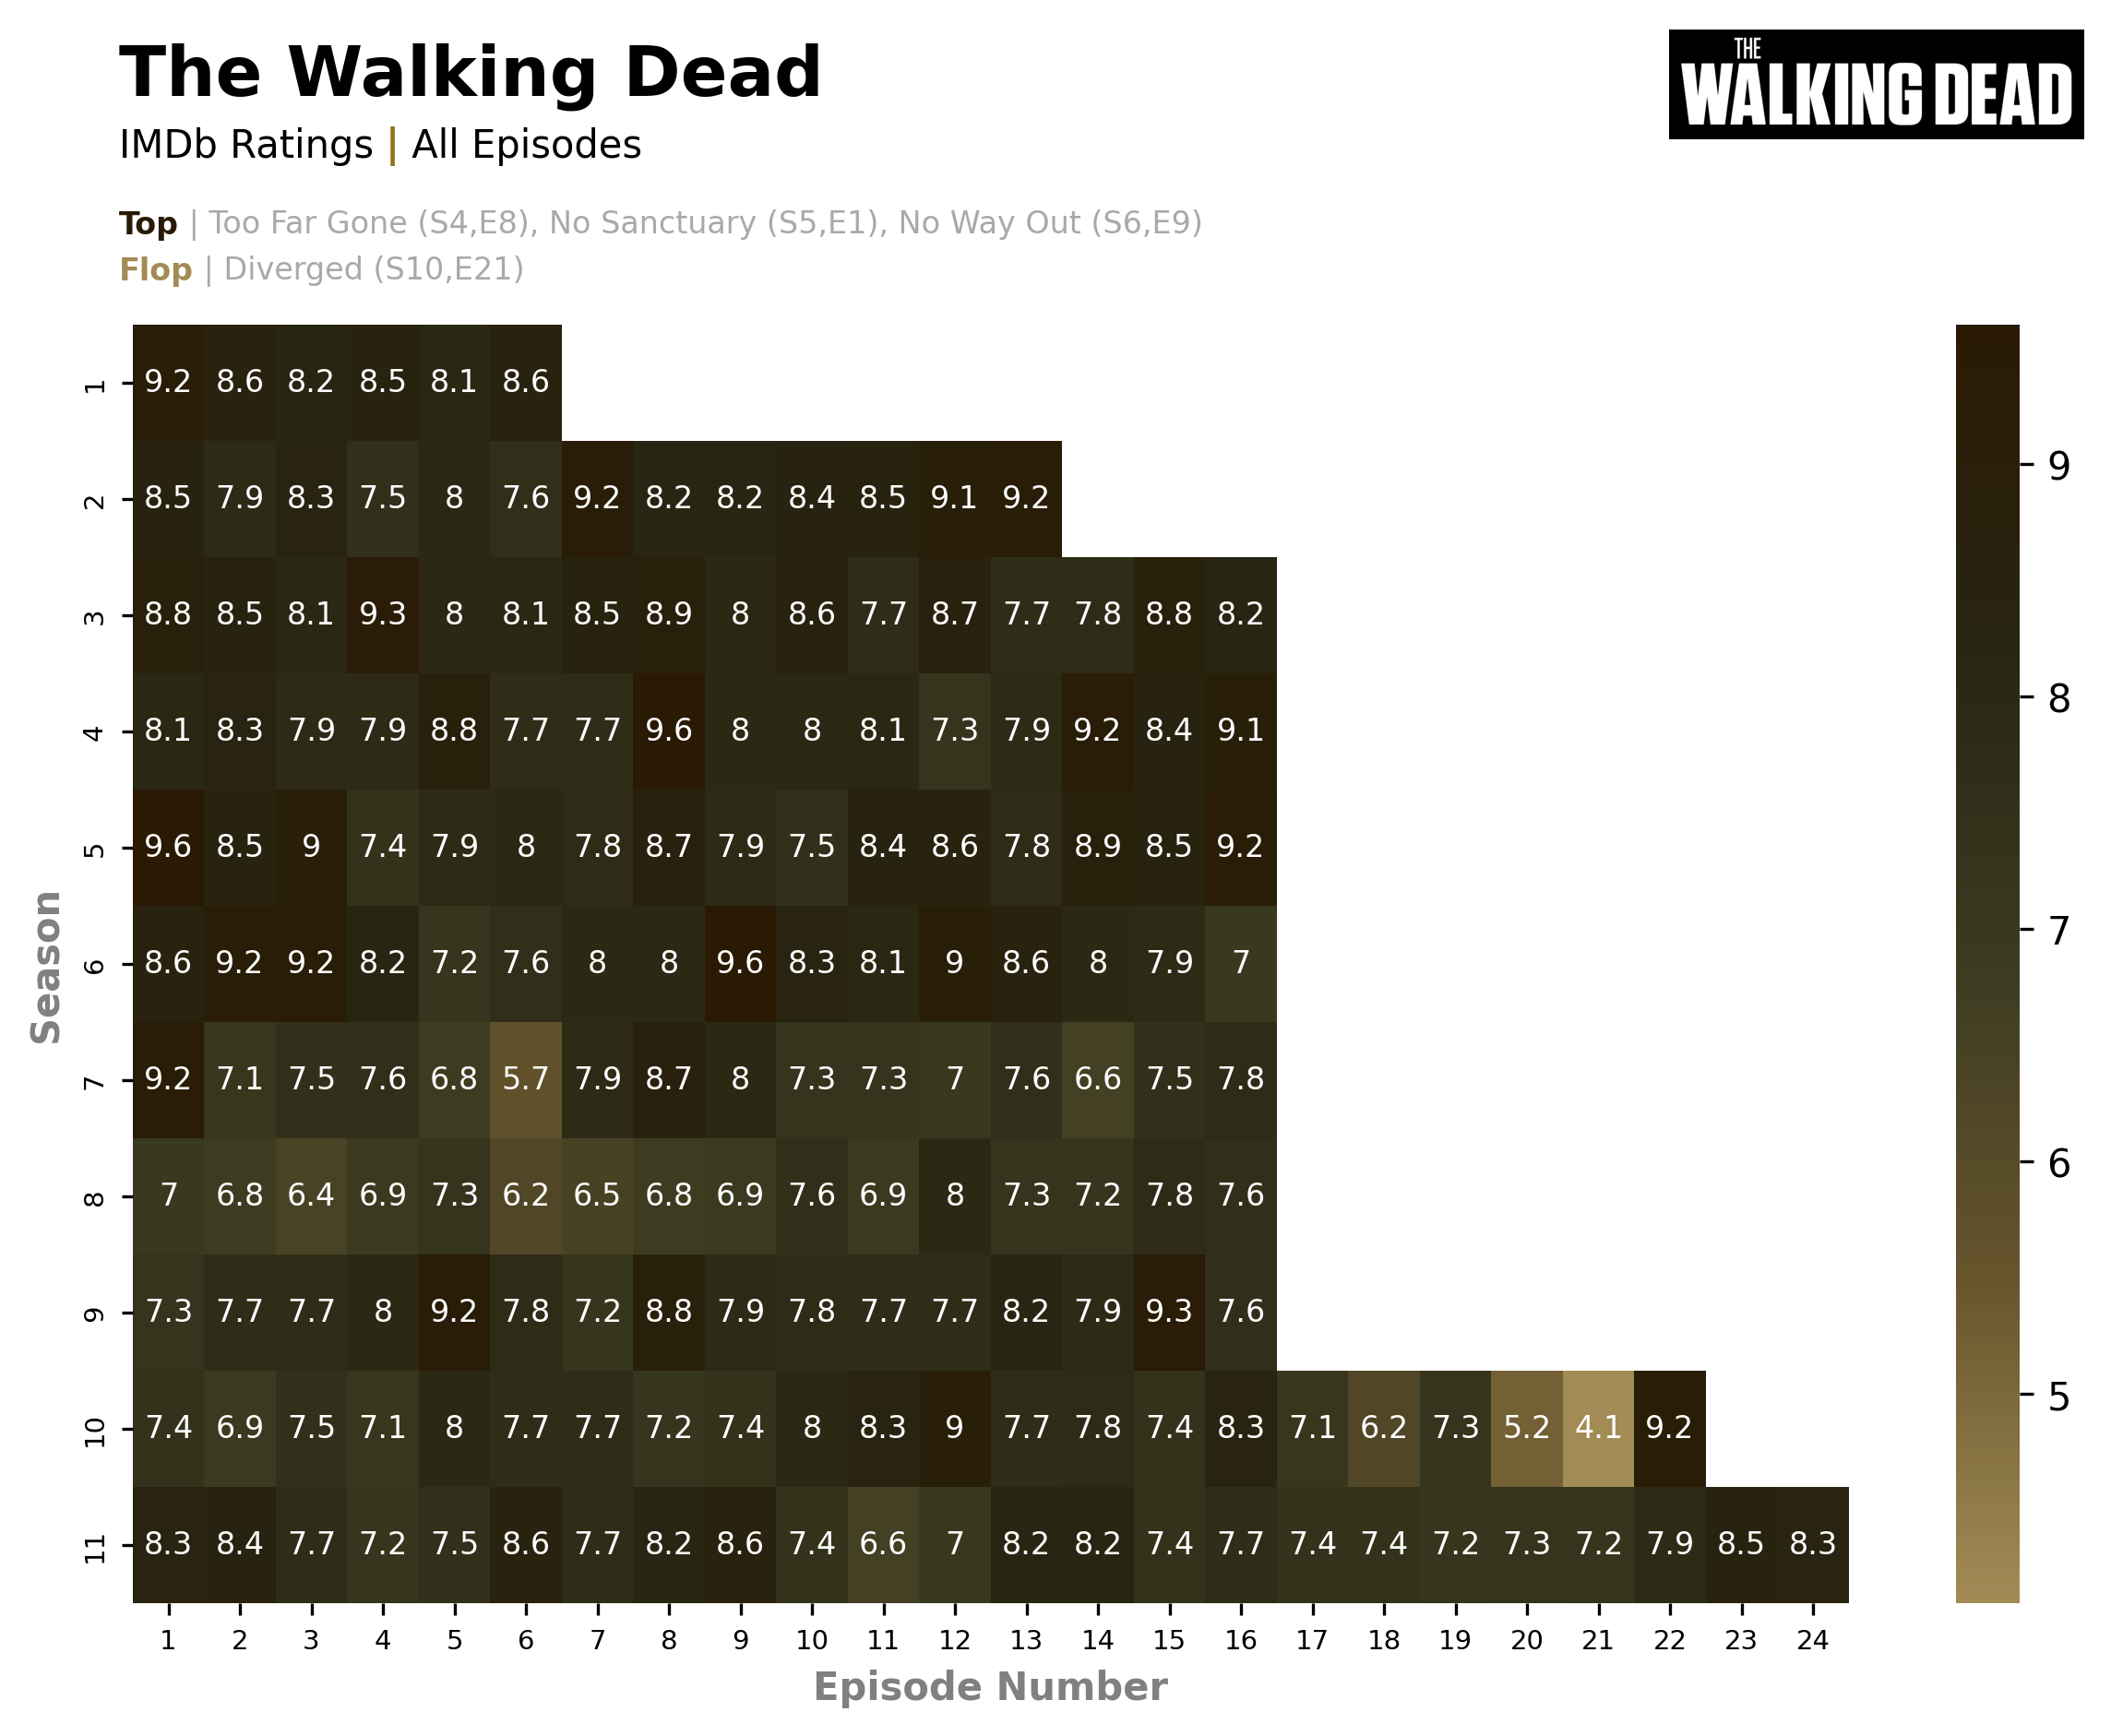

In [163]:
from matplotlib.colors import LinearSegmentedColormap

# Define your custom colormap using hex colors
colors_hex = ['#A28B55','#68552D', '#3B3B21','#282512', '#2A1A03']
colors_rgb = [(int(color[1:3], 16) / 255, int(color[3:5], 16) / 255, int(color[5:7], 16) / 255) for color in colors_hex]  # Convert hex to RGB
cmap_name = 'custom_cmap'
cm = LinearSegmentedColormap.from_list(cmap_name, colors_rgb, N=256)

# pivot the dataframe
twd_pivot = twd_episode_ratings.pivot(index='seasonNumber', columns='episodeNumber', values='averageRating')

# plot
fig = plt.figure(figsize=(10, 6), dpi=300, facecolor="white")
ax = plt.subplot(111, facecolor="white")

colormap = sns.color_palette("coolwarm")
sns.heatmap(twd_pivot, annot=True, annot_kws={"size": 8}, cmap=cm) # size reduce the numbers in the quadrants

# customize the ticks to match spinecolor and adjust label size
ax.tick_params(
    color = "black",
    length = 3,
    which = "major",
    labelsize = 7,
    labelcolor = "black",
    zorder = 3
)

plt.xlabel("Episode Number", color='grey', fontsize=10, weight='bold')
plt.ylabel("Season", color='grey', fontsize=10, weight='bold')

# title and subtitle for the legend
fig_text(
    x = 0.12, y = 1.05,
    s = "The Walking Dead",
    color = "black",
    weight = "bold",
    size = 18,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fig_text(
    x = 0.12, y = 1,
    s = "IMDb Ratings <|> All Episodes",
    highlight_textprops=[
        {"color": "#917416", "weight": "bold"}
    ],
    color = "black",
    size = 10,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fig_text(
    x = 0.12, y = 0.95,
    s = "<Top> | Too Far Gone (S4,E8), No Sanctuary (S5,E1), No Way Out (S6,E9)\n<Flop> | Diverged (S10,E21)",
    highlight_textprops=[
        {"color": "#2A1A03", "weight": "bold"},
        {"color": "#A28B55", "weight": "bold"}
    ],
    color = "darkgrey",
    size = 8,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

logo_url = "https://upload.wikimedia.org/wikipedia/commons/2/2e/The_Walking_Dead_Logo.png"

logo_ax = fig.add_axes([0.68, .95, 0.15, 0.15], zorder=1)
logo_icon = Image.open(urllib.request.urlopen(logo_url))
logo_ax.imshow(logo_icon)
logo_ax.axis("off")

plt.show()

In [164]:
# save figure
fig.savefig('../figures/twd_ratings_custom1.png', bbox_inches='tight')

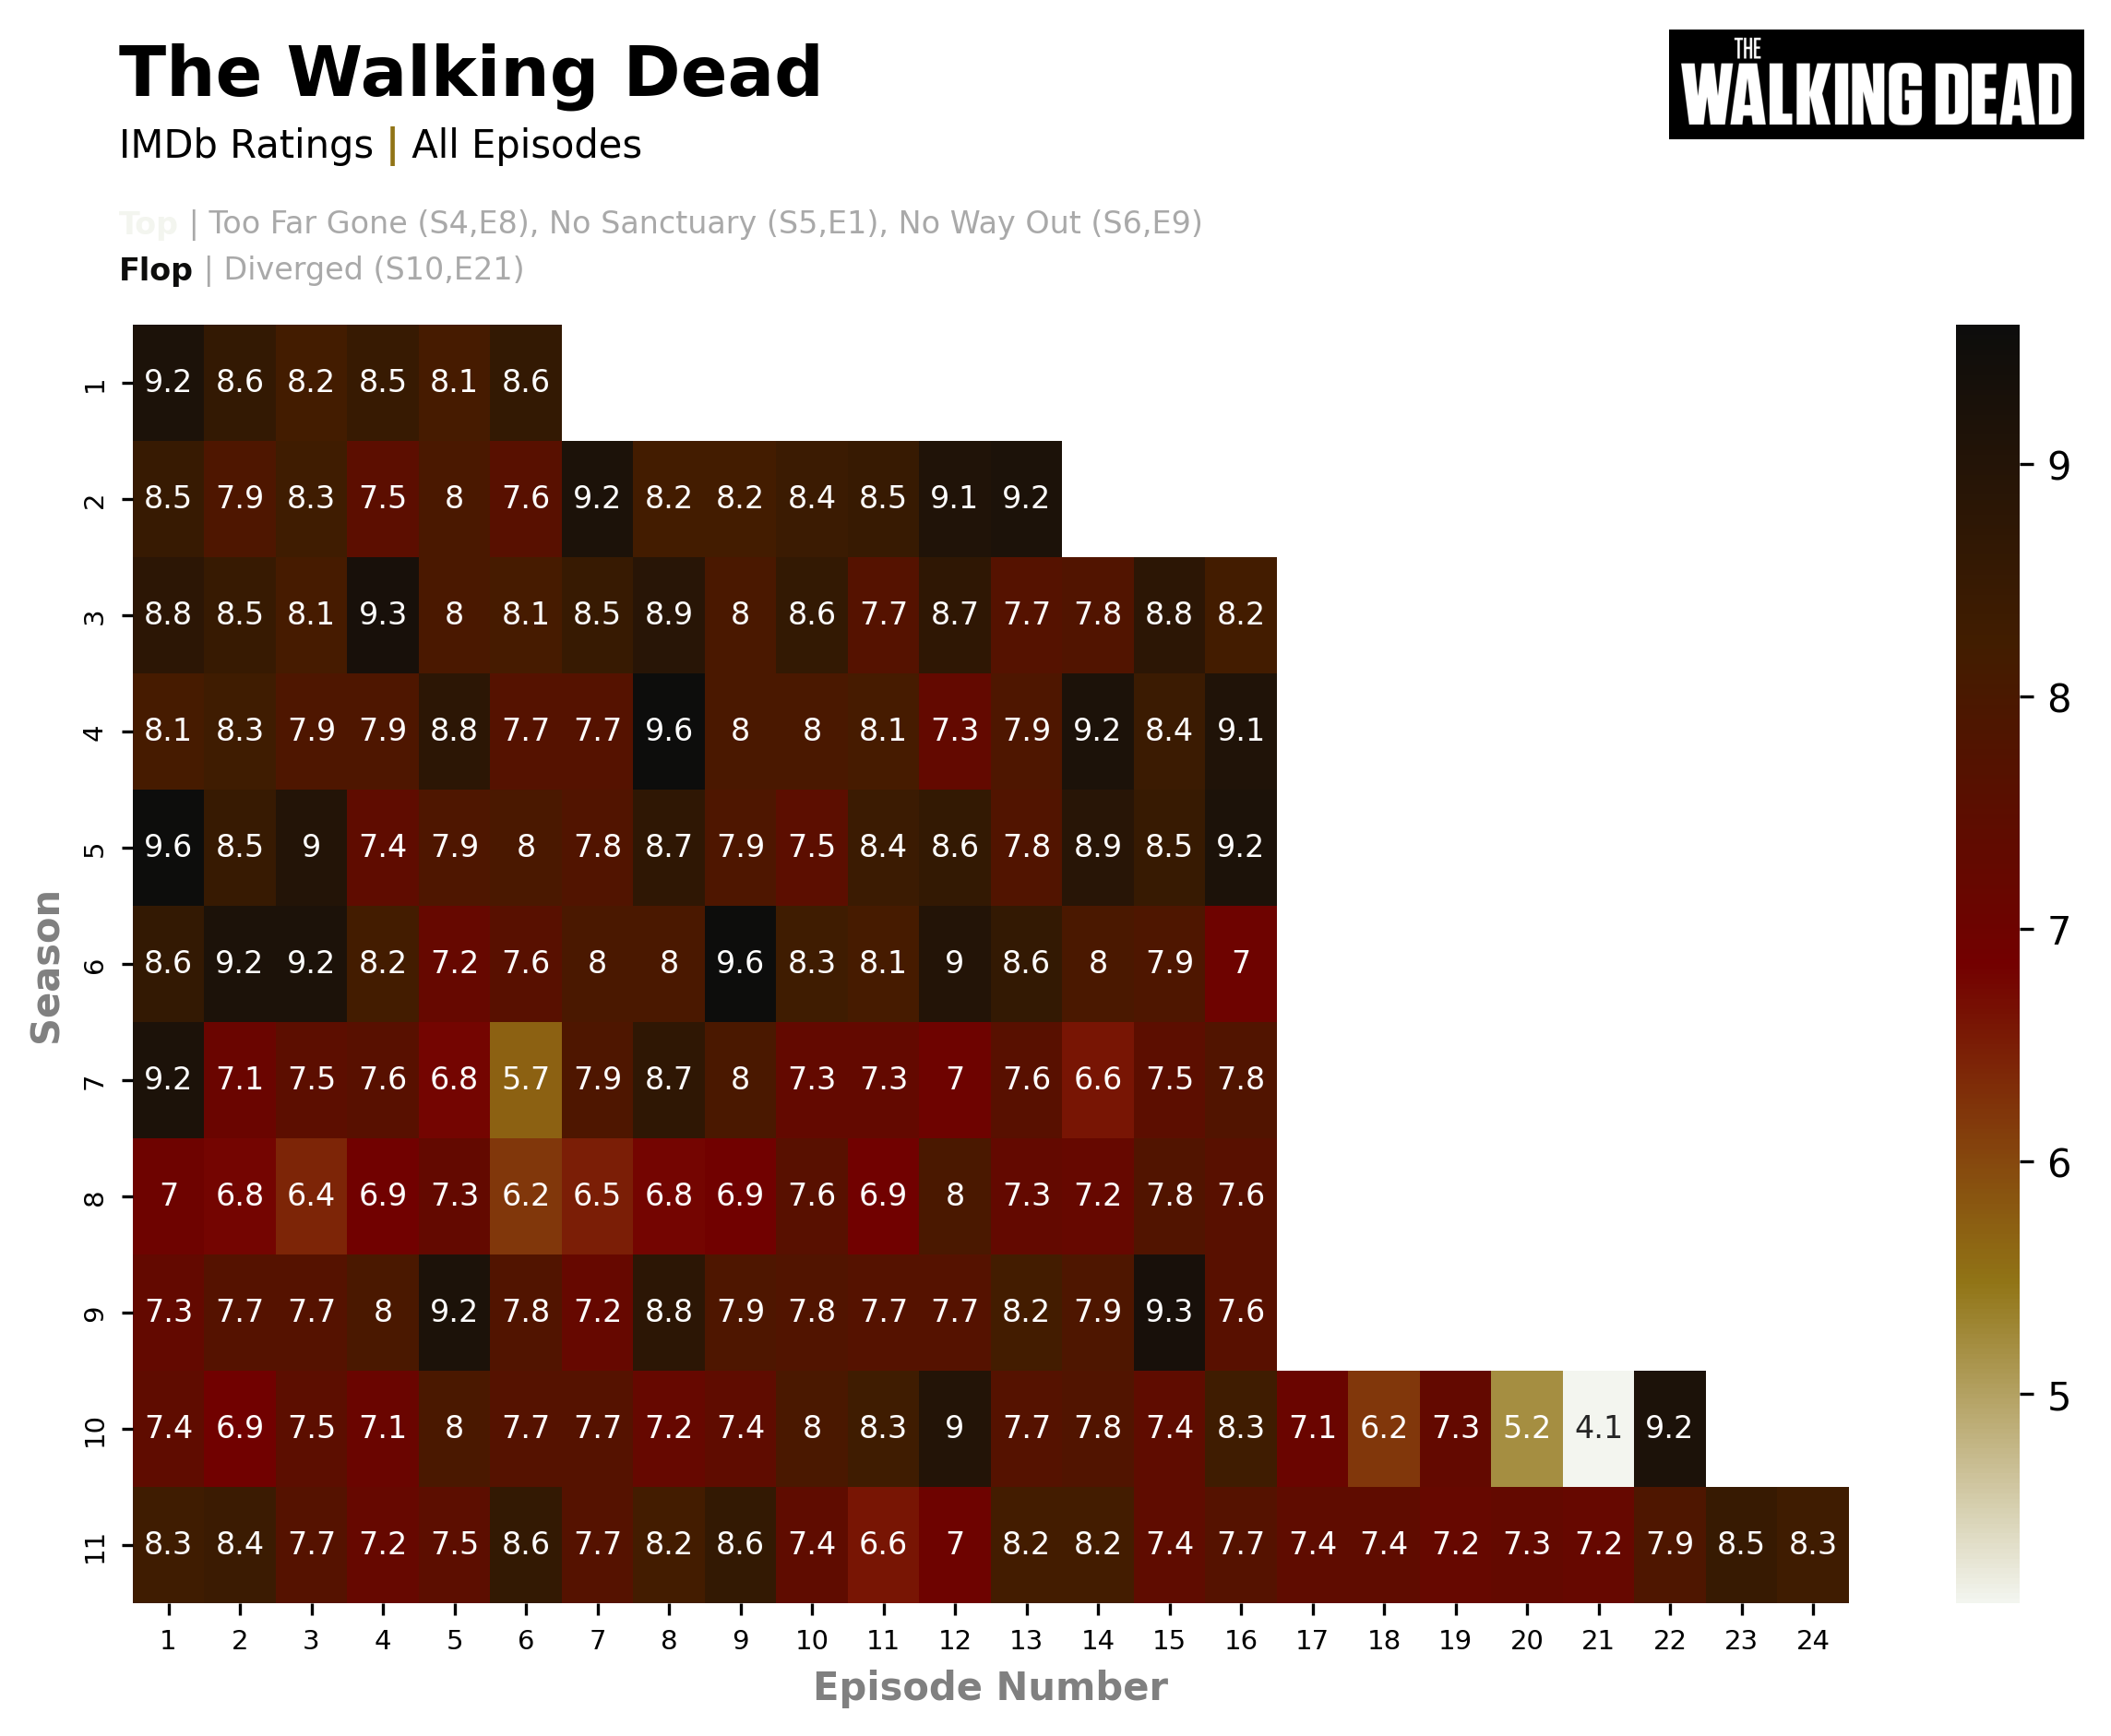

In [165]:
from matplotlib.colors import LinearSegmentedColormap

# Define your custom colormap using hex colors
colors_hex = ['#F3F5EF','#917416', '#730000', '#421D00', '#0D0D0C'] # reversed
colors_rgb = [(int(color[1:3], 16) / 255, int(color[3:5], 16) / 255, int(color[5:7], 16) / 255) for color in colors_hex]  # Convert hex to RGB
cmap_name = 'custom_cmap'
cm = LinearSegmentedColormap.from_list(cmap_name, colors_rgb, N=256)

# pivot the dataframe
twd_pivot = twd_episode_ratings.pivot(index='seasonNumber', columns='episodeNumber', values='averageRating')

# plot
fig = plt.figure(figsize=(10, 6), dpi=300, facecolor="white")
ax = plt.subplot(111, facecolor="white")

colormap = sns.color_palette("coolwarm")
sns.heatmap(twd_pivot, annot=True, annot_kws={"size": 8}, cmap=cm) # size reduce the numbers in the quadrants

# customize the ticks to match spinecolor and adjust label size
ax.tick_params(
    color = "black",
    length = 3,
    which = "major",
    labelsize = 7,
    labelcolor = "black",
    zorder = 3
)

plt.xlabel("Episode Number", color='grey', fontsize=10, weight='bold')
plt.ylabel("Season", color='grey', fontsize=10, weight='bold')

# title and subtitle for the legend
fig_text(
    x = 0.12, y = 1.05,
    s = "The Walking Dead",
    color = "black",
    weight = "bold",
    size = 18,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fig_text(
    x = 0.12, y = 1,
    s = "IMDb Ratings <|> All Episodes",
    highlight_textprops=[
        {"color": "#917416", "weight": "bold"}
    ],
    color = "black",
    size = 10,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fig_text(
    x = 0.12, y = 0.95,
    s = "<Top> | Too Far Gone (S4,E8), No Sanctuary (S5,E1), No Way Out (S6,E9)\n<Flop> | Diverged (S10,E21)",
    highlight_textprops=[
        {"color": "#F3F5EF", "weight": "bold"},
        {"color": "#0D0D0C", "weight": "bold"}
    ],
    color = "darkgrey",
    size = 8,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

logo_url = "https://upload.wikimedia.org/wikipedia/commons/2/2e/The_Walking_Dead_Logo.png"

logo_ax = fig.add_axes([0.68, .95, 0.15, 0.15], zorder=1)
logo_icon = Image.open(urllib.request.urlopen(logo_url))
logo_ax.imshow(logo_icon)
logo_ax.axis("off")

plt.show()

In [166]:
# save figure
fig.savefig('../figures/twd_ratings_custom2.png', bbox_inches='tight')